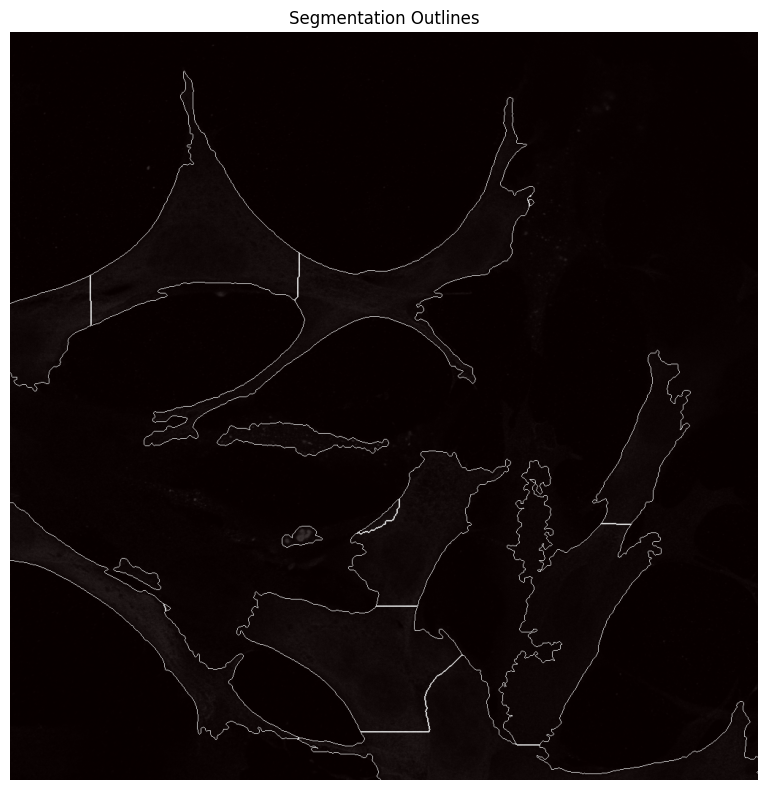

In [ ]:
# from skimage.segmentation import find_boundaries

# # Find outlines of segmented cells
# cell_boundaries = find_boundaries(cell_labels, mode='outer')

# # Plot outlines over cytoplasm image
# plt.figure(figsize=(8, 8))
# plt.imshow(cyto, cmap='gray')
# plt.imshow(cell_boundaries, cmap='hot', alpha=0.8)  # Overlay boundaries
# plt.title('Segmentation Outlines')
# plt.axis('off')
# plt.tight_layout()
# plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from aicsimageio import AICSImage
from cellpose import io, metrics, models, plot
from PIL import Image
from scipy import ndimage as ndi
from skimage import color, filters, io, measure, morphology, segmentation

img = io.imread('/Users/noah/Downloads/Finetune/Testing/15_img.tif')
imgL = AICSImage("15.lif")

masktrue = np.array(Image.open("/Users/noah/Downloads/Finetune/Testing/15_cp_masks.png").convert("L"))
masktrue = masktrue.astype(np.uint16)



Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




# Watershed IoU

Shape: (1, 4, 10, 1024, 1024)


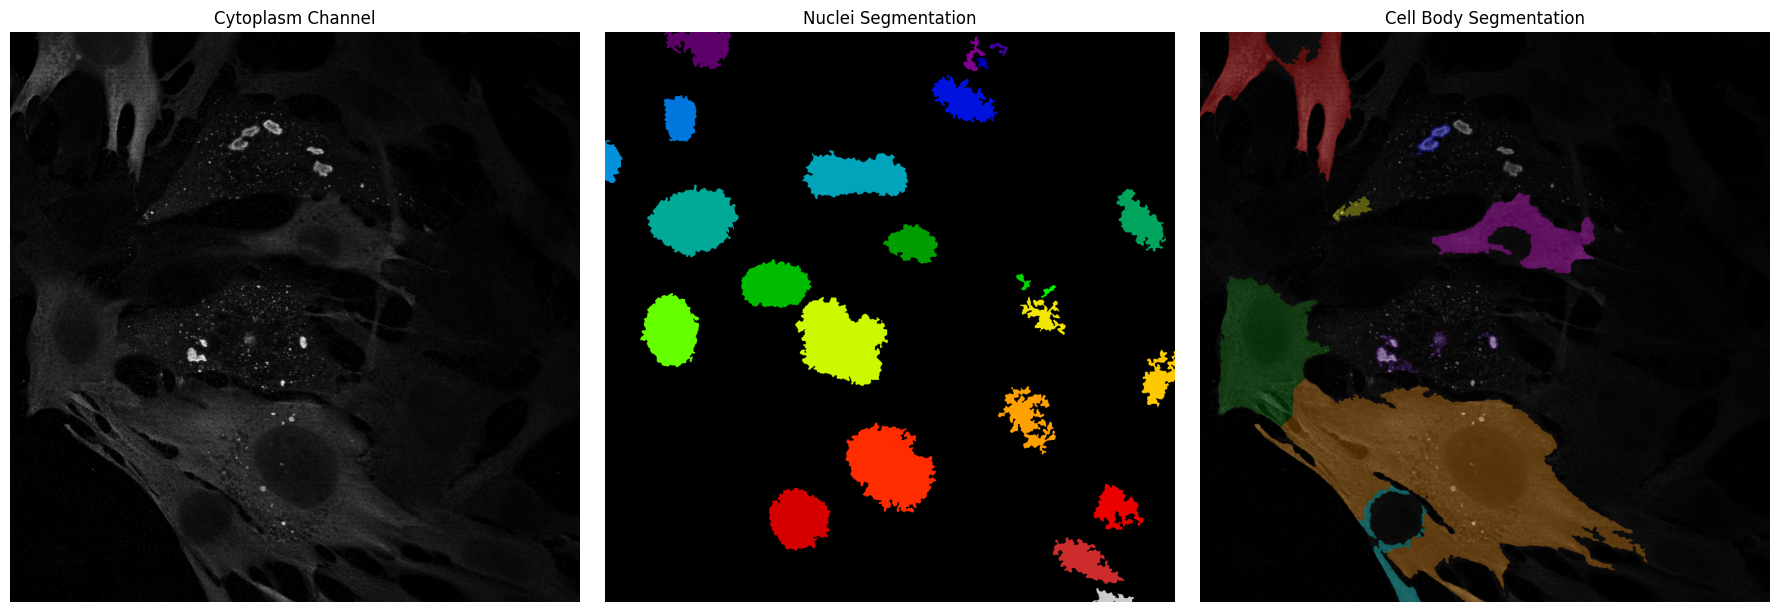

In [3]:
print("Shape:", imgL.shape)  # (T, C, Z, Y, X)

# Extract first timepoint and z-slice
cyto = imgL.get_image_data("TCZYX", T=0, C=1, Z=0).squeeze()   # Cytoplasm = Channel 0
nuclei = imgL.get_image_data("TCZYX", T=0, C=0, Z=0).squeeze()  # Nucleus = Channel 1

# --- Segment nuclei ---
nuclei_blur = filters.gaussian(nuclei, sigma=2)
nuc_thresh = filters.threshold_otsu(nuclei_blur)
nuc_mask = nuclei_blur > nuc_thresh
nuc_mask = morphology.remove_small_objects(nuc_mask, min_size=200)
nuc_mask = ndi.binary_fill_holes(nuc_mask)
nuc_labels = measure.label(nuc_mask)

# --- Segment cytoplasm ---
cyto_blur = filters.gaussian(cyto, sigma=2)
cyto_thresh = filters.threshold_otsu(cyto_blur)
cyto_mask = cyto_blur > cyto_thresh
cyto_mask = morphology.remove_small_objects(cyto_mask, min_size=500)
cyto_mask = ndi.binary_fill_holes(cyto_mask)

# --- Watershed segmentation ---
distance = ndi.distance_transform_edt(cyto_mask)
cell_labels = segmentation.watershed(-distance, nuc_labels, mask=cyto_mask)

# --- Plot results ---
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(cyto, cmap='gray')
ax[0].set_title('Cytoplasm Channel')
ax[1].imshow(nuc_labels, cmap='nipy_spectral')
ax[1].set_title('Nuclei Segmentation')
ax[2].imshow(color.label2rgb(cell_labels, image=cyto, bg_label=0))
ax[2].set_title('Cell Body Segmentation')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

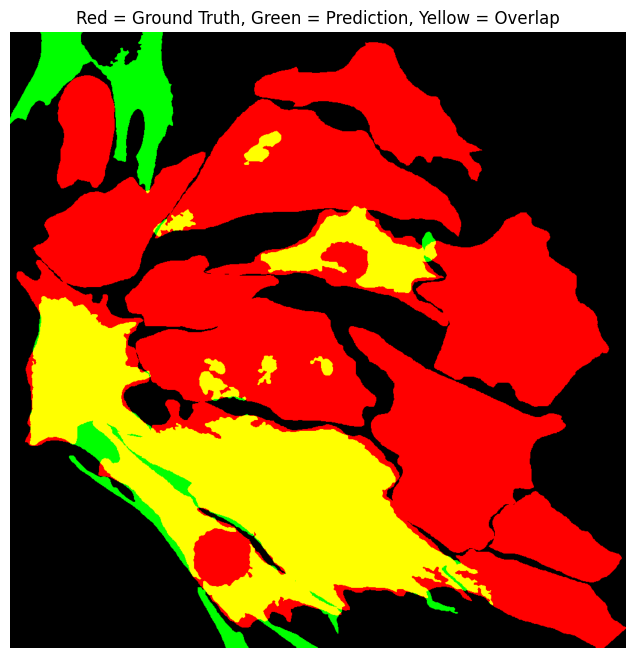

np.float64(0.14963719072541082)

In [4]:
# Create an RGB image
h, w = masktrue.shape
overlay = np.zeros((h, w, 3), dtype=np.uint8)

overlay[..., 0] = (masktrue > 0) * 255  # Red
overlay[..., 1] = (cell_labels > 0) * 255      # Green

plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("Red = Ground Truth, Green = Prediction, Yellow = Overlap")
plt.axis("off")
plt.show()

ious = metrics.mask_ious(masktrue, cell_labels)
ious[0].mean()  # Mean IoU

# Cellpose inference
Finetune 1

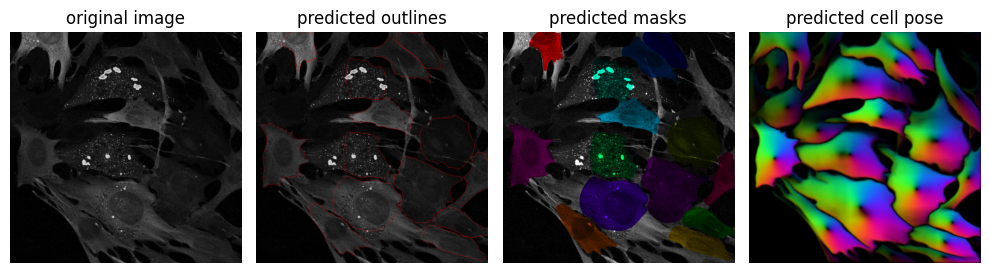

Mean IoU: 0.5754924575641253


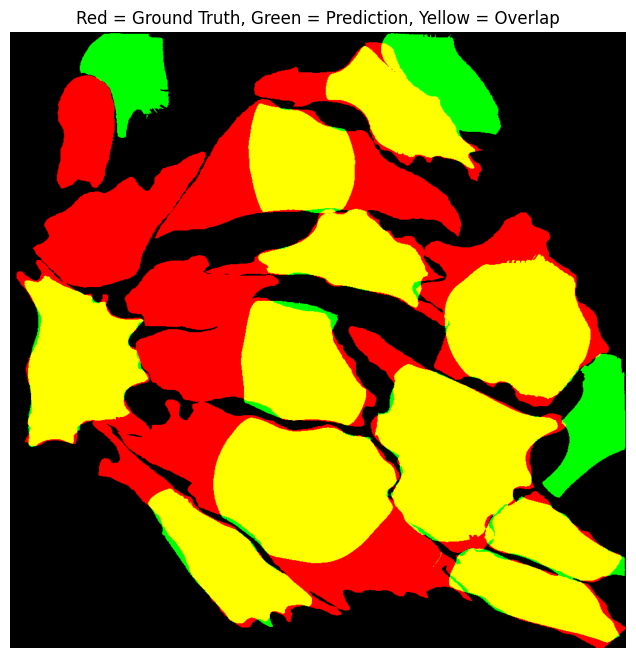

In [13]:
model = models.CellposeModel(pretrained_model='/Users/noah/Library/Mobile Documents/com~apple~CloudDocs/HvA/Master AAI/Afstuderen/Afstudeer Opdracht/finetune/models/finetune1 100 epoch', gpu=True)

masks, flows, styles = model.eval(img)


fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()

ious = metrics.mask_ious(masktrue, masks)
print("Mean IoU: " + str(ious[0].mean()))

# Create an RGB image
h, w = masktrue.shape
overlay = np.zeros((h, w, 3), dtype=np.uint8)

overlay[..., 0] = (masktrue > 0) * 255  # Red
overlay[..., 1] = (masks > 0) * 255      # Green

plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("Red = Ground Truth, Green = Prediction, Yellow = Overlap")
plt.axis("off")
plt.show()

pretrained model /Users/noah/.cellpose/models/cpsam not found, using default model


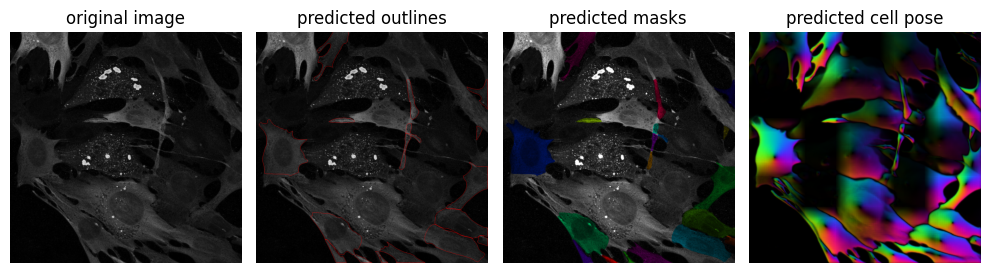

Mean IoU: 0.22956042125780662


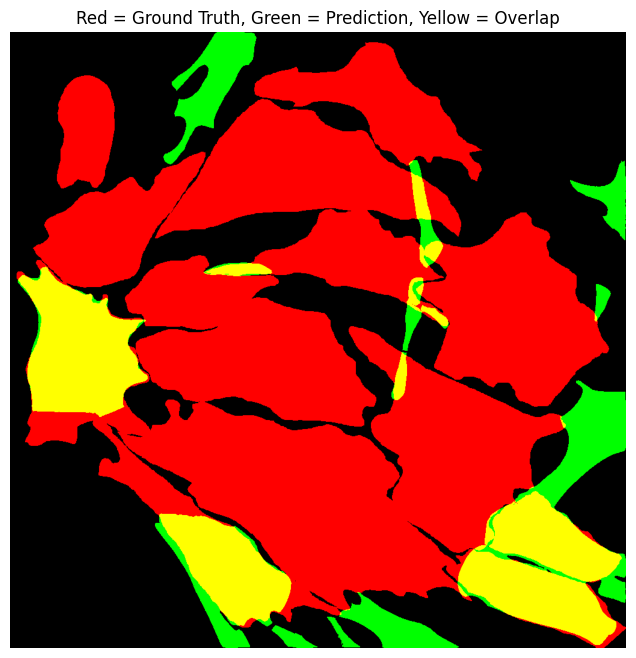

In [6]:
model = models.CellposeModel(pretrained_model='/Users/noah/Library/Mobile Documents/com~apple~CloudDocs/HvA/Master AAI/Afstuderen/Afstudeer Opdracht/finetune/models/finetune 250 epoch', gpu=True)

masks, flows, styles = model.eval(img)

fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()


ious = metrics.mask_ious(masktrue, masks)
print("Mean IoU: " + str(ious[0].mean()))

# Create an RGB image
h, w = masktrue.shape
overlay = np.zeros((h, w, 3), dtype=np.uint8)

overlay[..., 0] = (masktrue > 0) * 255  # Red
overlay[..., 1] = (masks > 0) * 255      # Green

plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("Red = Ground Truth, Green = Prediction, Yellow = Overlap")
plt.axis("off")
plt.show()

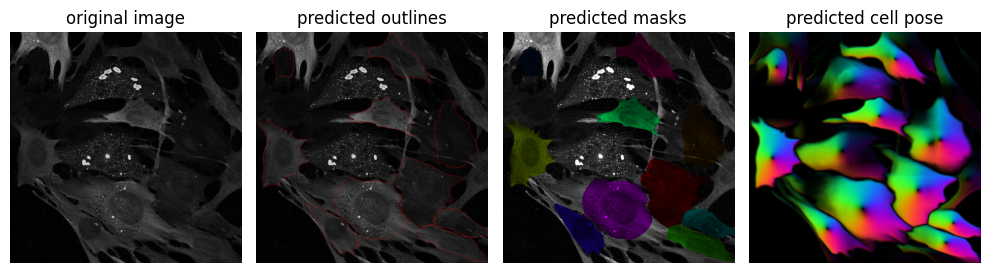

Mean IoU: 0.5435795172310456


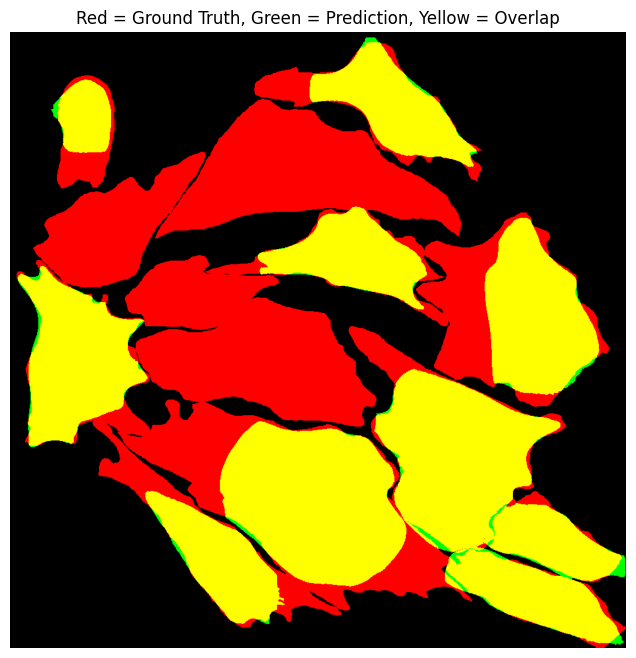

In [7]:
model = models.CellposeModel(pretrained_model='/Users/noah/Library/Mobile Documents/com~apple~CloudDocs/HvA/Master AAI/Afstuderen/Afstudeer Opdracht/finetune/models/finetune augmentation', gpu=True)

masks, flows, styles = model.eval(img)

fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()


ious = metrics.mask_ious(masktrue, masks)
print("Mean IoU: " + str(ious[0].mean()))

# Create an RGB image
h, w = masktrue.shape
overlay = np.zeros((h, w, 3), dtype=np.uint8)

overlay[..., 0] = (masktrue > 0) * 255  # Red
overlay[..., 1] = (masks > 0) * 255      # Green

plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("Red = Ground Truth, Green = Prediction, Yellow = Overlap")
plt.axis("off")
plt.show()

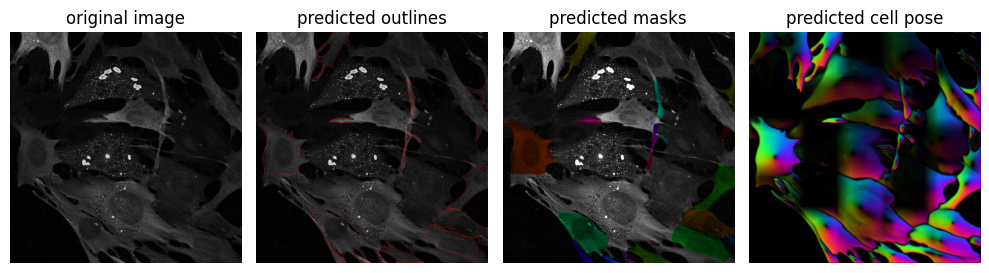

Mean IoU: 0.22956042125780662


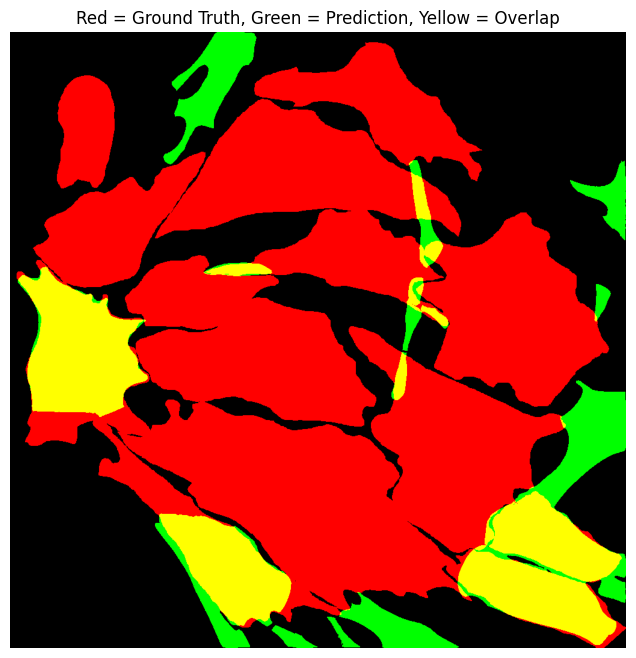

In [8]:
model = models.CellposeModel(gpu=True)

masks, flows, styles = model.eval(img)

fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()


ious = metrics.mask_ious(masktrue, masks)
print("Mean IoU: " + str(ious[0].mean()))

# Create an RGB image
h, w = masktrue.shape
overlay = np.zeros((h, w, 3), dtype=np.uint8)

overlay[..., 0] = (masktrue > 0) * 255  # Red
overlay[..., 1] = (masks > 0) * 255      # Green

plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("Red = Ground Truth, Green = Prediction, Yellow = Overlap")
plt.axis("off")
plt.show()

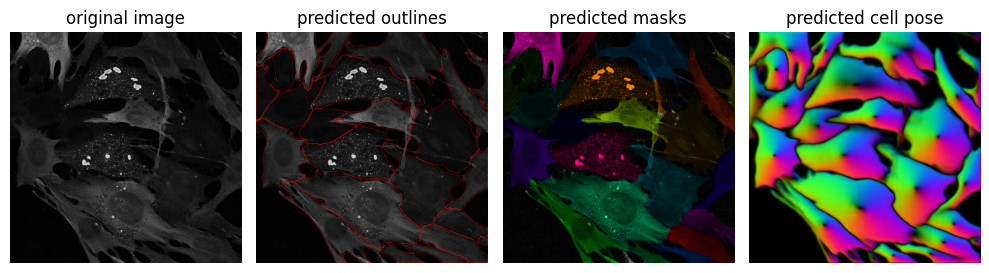

Mean IoU: 0.8056641643212382


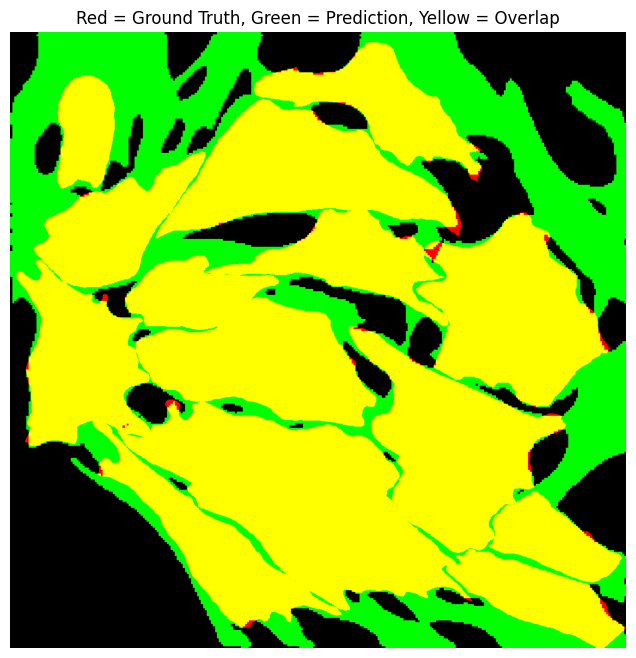

In [3]:
model = models.CellposeModel(gpu=True)

masks, flows, styles = model.eval(
    img,
    # batch_size=32,
    # flow_threshold=0.4,
    # cellprob_threshold=0.0,
    # normalize={"tile_norm_blocksize": 0},
     diameter=100,
    # tile_overlap=0.1,
    # augment=False,
    # min_size=100,
)

# Visualize the result
fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()


ious = metrics.mask_ious(masktrue, masks)
print("Mean IoU: " + str(ious[0].mean()))

# Create an RGB image
h, w = masktrue.shape
overlay = np.zeros((h, w, 3), dtype=np.uint8)

overlay[..., 0] = (masktrue > 0) * 255  # Red
overlay[..., 1] = (masks > 0) * 255      # Green

plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("Red = Ground Truth, Green = Prediction, Yellow = Overlap")
plt.axis("off")
plt.show()